scvis Testing
---

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *

Using TensorFlow backend.
/home/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


---
### Retina Dataset (Discrete)

In [2]:
latent = pd.read_csv('scvis_out/retina/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', sep='\t', index_col=0)
latent = np.array(latent)
latent = latent.copy(order='C')

In [3]:
retina_scvis = DR(matrix=latent)
retina_scvis.results = latent
retina_scvis.clu = Cluster(latent.astype('double'), autoplot=False)
retina_scvis.name = 'scvis'

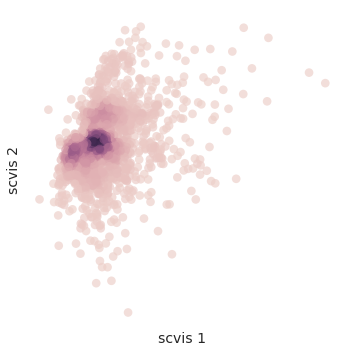

In [4]:
retina_scvis.plot()

In [5]:
# read in counts fed into scvis
retina = RNA_counts.from_file(datafile='../inputs/GSM1626793_P14Retina_1.processed.tsv', labels=[0,0])

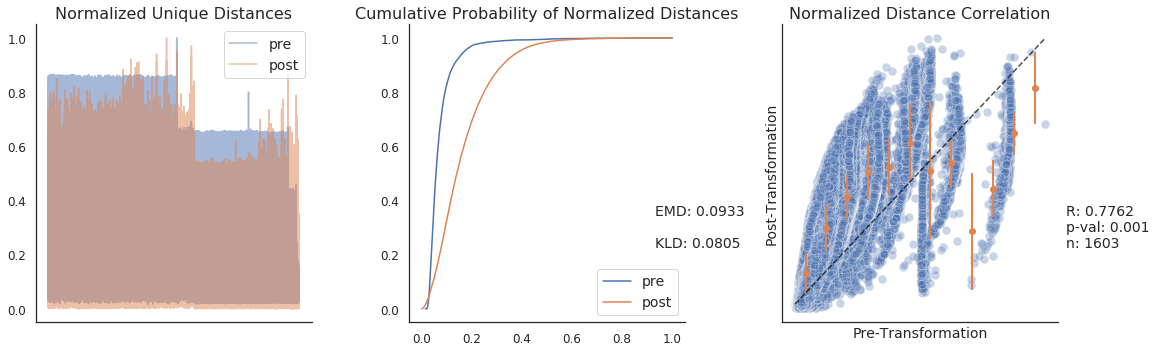

Knn Preservation: 98.041

CPU times: user 1min 35s, sys: 12.6 s, total: 1min 47s
Wall time: 1min 46s


In [6]:
%%time
k=30
# look at scvis vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=retina.distance_matrix(transform=None), 
                                  post=retina_scvis.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=retina.knn_graph(k, transform=None), 
                                                       post=retina_scvis.knn_graph(k))))

---
### Colon Dataset (Continuous)

In [8]:
latent = pd.read_csv('scvis_out/colon/perplexity_30_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.tsv', sep='\t', index_col=0)
latent = np.array(latent)
latent = latent.copy(order='C')

In [9]:
colon_scvis = DR(matrix=latent)
colon_scvis.results = latent
colon_scvis.clu = Cluster(latent.astype('double'), autoplot=False)
colon_scvis.name = 'scvis'

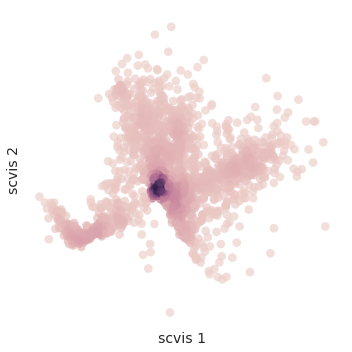

In [10]:
colon_scvis.plot()

In [11]:
# read in counts fed into scvis
colon = RNA_counts.from_file(datafile='../inputs/GSM2743164_rep1_colon_rnaseq.processed.tsv', labels=[0,0])

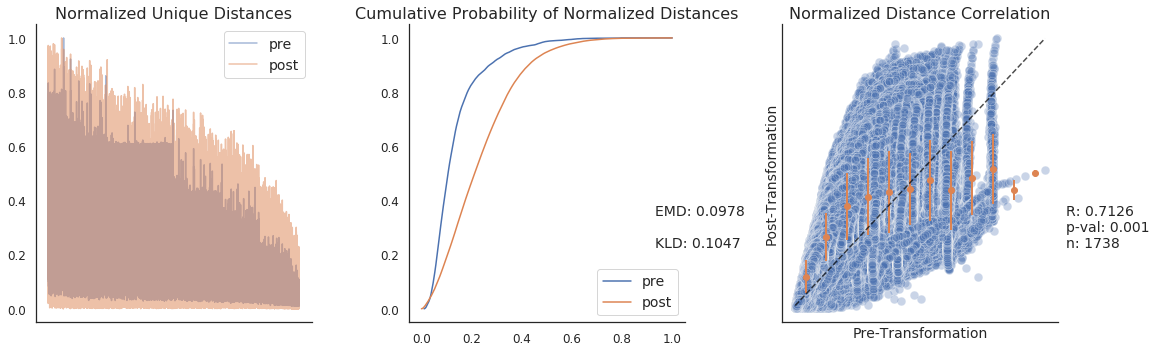

Knn Preservation: 98.3118

CPU times: user 1min 43s, sys: 15.1 s, total: 1min 58s
Wall time: 1min 57s


In [12]:
%%time
k=30
# look at scvis vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=colon.distance_matrix(transform=None), 
                                  post=colon_scvis.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=colon.knn_graph(k, transform=None), 
                                                       post=colon_scvis.knn_graph(k))))